<a href="https://colab.research.google.com/github/Rakesh-025/ANN-Deep-Learning/blob/main/Torch_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
#from torchvision.transorms as transforms

In [2]:
train_data = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 12.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 368kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.19MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.81MB/s]


In [3]:
test_data = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

In [4]:
BATCHSIZE = 8

In [5]:
train_gen = torch.utils.data.DataLoader(dataset=train_data, batch_size=BATCHSIZE, shuffle=True)
#train_gen = train_data.DataLoader(batch_size=64, shuffle=True)


In [6]:
test_gen = torch.utils.data.DataLoader(dataset=test_data, batch_size=BATCHSIZE, shuffle=False)


In [7]:
import matplotlib.pyplot as plt

data_iterator = iter(test_gen)
images, labels = next(data_iterator)
print(images.shape)
print(labels.shape)

torch.Size([8, 1, 28, 28])
torch.Size([8])


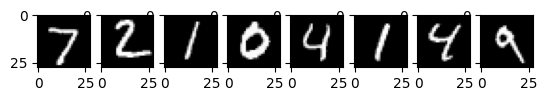

In [8]:
for i in range(BATCHSIZE):
  plt.subplot(1, BATCHSIZE, i+1)
  plt.imshow(images[i].squeeze(), cmap='gray')

In [13]:
class Linear(nn.Module):
  def __init__(self, in_feats,out_feats):  # 512 *256
    super(Linear, self).__init__()

    self.weight = nn.Parameter(torch.randn(out_feats, in_feats))
    self.bias =  nn.Parameter(torch.zeros(out_feats))

  def forward(self, x):
   # return torch.mm(x, self.weight.t()) + self.bias
   # Y =cx*W^T + b
    output = x @ self.weight.T + self.bias
    return output

In [52]:
class ReLU(nn.Module):
  # ouptut = max(0,output)

  def forward(self,x):
    output =  torch.maximum(x,torch.tensor(0.0, device = x.device) )
    return output

In [53]:
# class ReLU(nn.Module):
#   # ouptut = max(0,output)

#   def forward(self,x):
#     output =  torch.maximum(x,torch.zeros_like(x))
#     return output

In [54]:
class MyNeuralNetwork(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(MyNeuralNetwork, self).__init__()

    self.linear1 = Linear(784,256)
    self.relu = ReLU()
    self.linear2 = Linear(256,10)

  def forward(self,x):
    output = self.linear1(x)
    output = self.relu(output)
    output = self.linear2(output)
    return output


In [55]:
model = MyNeuralNetwork(784,  256, 10)
model.cuda()

MyNeuralNetwork(
  (linear1): Linear()
  (relu): ReLU()
  (linear2): Linear()
)

In [56]:
!nvidia-smi

Sat Nov  1 11:59:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   72C    P0             32W /   70W |     164MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [57]:
loss = nn.CrossEntropyLoss()

# We need to provide the learnable parametes to the optimizer, model.parameters() provides the params to the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [59]:
from torch.autograd import Variable
EPOCH = 1

for epoch in range(EPOCH):
  for i, (images, labels) in enumerate(train_gen):
    images = Variable(images.view(-1,784)).cuda()
    labels = Variable(labels).cuda()
    optimizer.zero_grad()
    outputs = model(images)
    loss_value = loss(outputs, labels)
    loss_value.backward() # gradients
    optimizer.step()
    if i%100 == 0:
      print("Epoch No:",epoch+1,"step No:", i+1, "Loss: ", loss_value.data)



Epoch No: 1 step No: 1 Loss:  tensor(164.2549, device='cuda:0')
Epoch No: 1 step No: 101 Loss:  tensor(92.8513, device='cuda:0')
Epoch No: 1 step No: 201 Loss:  tensor(77.3536, device='cuda:0')
Epoch No: 1 step No: 301 Loss:  tensor(101.0719, device='cuda:0')
Epoch No: 1 step No: 401 Loss:  tensor(65.8134, device='cuda:0')
Epoch No: 1 step No: 501 Loss:  tensor(98.0947, device='cuda:0')
Epoch No: 1 step No: 601 Loss:  tensor(40.1130, device='cuda:0')
Epoch No: 1 step No: 701 Loss:  tensor(40.4887, device='cuda:0')
Epoch No: 1 step No: 801 Loss:  tensor(66.7515, device='cuda:0')
Epoch No: 1 step No: 901 Loss:  tensor(24.9253, device='cuda:0')
Epoch No: 1 step No: 1001 Loss:  tensor(33.8493, device='cuda:0')
Epoch No: 1 step No: 1101 Loss:  tensor(62.9966, device='cuda:0')
Epoch No: 1 step No: 1201 Loss:  tensor(46.4527, device='cuda:0')
Epoch No: 1 step No: 1301 Loss:  tensor(81.4836, device='cuda:0')
Epoch No: 1 step No: 1401 Loss:  tensor(44.1019, device='cuda:0')
Epoch No: 1 step No:

In [62]:
## Prediction

correct_num = 0
total_num = 0
for i, (images, labels) in enumerate(test_gen):
  images = Variable(images.view(-1,784)).cuda()
  labels = Variable(labels).cuda()
  outputs = model(images)

  _,outputs = torch.max(outputs, 1)
  print(outputs)
  correct_batch = (outputs == labels).sum()
  correct_num += correct_batch
  total_num += BATCHSIZE


  # correct_batch = (outputs.argmax(1) == labels).sum()
  # correct_num += correct_batch
  # total_num += BATCHSIZE
  # correct_batch = (outputs == labels).sum()
  # correct_num += correct_batch
  # total_num += BATCHSIZE

tensor([7, 2, 1, 0, 6, 1, 4, 9], device='cuda:0')
tensor([4, 9, 0, 2, 9, 0, 1, 5], device='cuda:0')
tensor([9, 7, 3, 4, 7, 6, 6, 5], device='cuda:0')
tensor([4, 0, 7, 4, 0, 1, 3, 9], device='cuda:0')
tensor([3, 0, 7, 8, 7, 1, 2, 1], device='cuda:0')
tensor([6, 7, 4, 2, 7, 5, 3, 2], device='cuda:0')
tensor([4, 4, 6, 3, 4, 5, 6, 3], device='cuda:0')
tensor([4, 1, 9, 8, 7, 2, 5, 3], device='cuda:0')
tensor([7, 3, 6, 4, 3, 0, 7, 0], device='cuda:0')
tensor([3, 7, 6, 3, 3, 7, 9, 7], device='cuda:0')
tensor([7, 6, 2, 7, 5, 4, 7, 0], device='cuda:0')
tensor([6, 1, 3, 6, 4, 3, 1, 4], device='cuda:0')
tensor([7, 7, 0, 9, 6, 0, 5, 4], device='cuda:0')
tensor([9, 9, 0, 1, 4, 4, 8, 9], device='cuda:0')
tensor([3, 7, 7, 6, 4, 4, 4, 7], device='cuda:0')
tensor([5, 6, 3, 6, 4, 4, 2, 5], device='cuda:0')
tensor([8, 5, 6, 6, 5, 2, 8, 1], device='cuda:0')
tensor([0, 1, 6, 9, 6, 7, 3, 1], device='cuda:0')
tensor([9, 1, 8, 2, 0, 7, 9, 8], device='cuda:0')
tensor([5, 5, 1, 5, 6, 0, 0, 4], device='cuda:0')


In [63]:
accuracy = correct_num / total_num * 100
print('Accuracy: {}%'.format(accuracy))

Accuracy: 79.13999938964844%
